In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
# Import supplementary visualization code visuals.py
import visuals as vs
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier

/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Pretty display for notebooks
%matplotlib inline

# Load the  dataset
train_data = pd.read_csv("train.csv")

# Success - Display the first 5 records
display(train_data.head(n=5))

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
# TODO: Total number of records
train_data.shape

(76020, 371)

In [4]:
# TODO: Number of records where individual's income is more than $50,000
train_data[train_data["TARGET"] == 0].shape[0]

73012

In [5]:
def get_type_lists(data_frame=train_data, rejects=['ID']):

    """Creates lists of numeric and categorical variables.
    
    :param frame: The frame from which to determine types.
    :param rejects: Variable names not to be included in returned lists.
    :return: Tuple of lists for numeric and categorical variables in the frame.

    """
    nums, cats = [], []

    for col in data_frame.columns:
        if col not in rejects:
            type=data_frame[col].dtype
            if type in ('int64','int32','float64') :
                nums.append(col)
            elif str(type) in ('object')  :
                cats.append(col)
                
    print('Numeric =', nums)                
    print()
    print('Categorical =', cats)
    
    return nums, cats

In [6]:
original_nums, cats = get_type_lists()

Numeric = ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1', 'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_comer_ult1', 'imp_op_var41_comer_ult3', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var41_ult1', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_op_var39_ult1', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_

In [7]:
# print variables with missing data
for col in original_nums:
    if train_data[col].isnull().mean()>0:
        print(col, train_data[col].isnull().mean())

In [8]:
# Identify missing or unknown data values and convert them to NaNs.
missingpercent = train_data.isnull().sum().sort_values(ascending=False)
missingpercent=missingpercent[missingpercent > 0]
missingpercent=(missingpercent/train_data.shape[0])*100
missingpercent

Series([], dtype: float64)

In [9]:
# how many labels in each variable

for col in train_data.columns:
    print(col, ': ', len(train_data[col].unique()), ' labels')

ID :  76020  labels
var3 :  208  labels
var15 :  100  labels
imp_ent_var16_ult1 :  596  labels
imp_op_var39_comer_ult1 :  7551  labels
imp_op_var39_comer_ult3 :  9099  labels
imp_op_var40_comer_ult1 :  293  labels
imp_op_var40_comer_ult3 :  346  labels
imp_op_var40_efect_ult1 :  23  labels
imp_op_var40_efect_ult3 :  29  labels
imp_op_var40_ult1 :  224  labels
imp_op_var41_comer_ult1 :  7421  labels
imp_op_var41_comer_ult3 :  8961  labels
imp_op_var41_efect_ult1 :  331  labels
imp_op_var41_efect_ult3 :  454  labels
imp_op_var41_ult1 :  8032  labels
imp_op_var39_efect_ult1 :  336  labels
imp_op_var39_efect_ult3 :  462  labels
imp_op_var39_ult1 :  8149  labels
imp_sal_var16_ult1 :  66  labels
ind_var1_0 :  2  labels
ind_var1 :  2  labels
ind_var2_0 :  1  labels
ind_var2 :  1  labels
ind_var5_0 :  2  labels
ind_var5 :  2  labels
ind_var6_0 :  2  labels
ind_var6 :  2  labels
ind_var8_0 :  2  labels
ind_var8 :  2  labels
ind_var12_0 :  2  labels
ind_var12 :  2  labels
ind_var13_0 :  2  label

In [10]:
# find and remove correlated features
# to reduce the feature space

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(train_data, 0.75)
print('correlated features: ', len(set(corr_features)) )

correlated features:  219


In [11]:
# removed correlated  features
train_data.drop(labels=corr_features, axis=1, inplace=True)
#X_test.drop(labels=corr_features, axis=1, inplace=True)

In [12]:
train_data.shape

(76020, 152)

In [13]:
# remove constant features
constant_features = [
    feat for feat in train_data.columns if train_data[feat].std() == 0
]

train_data.drop(labels=constant_features, axis=1, inplace=True)
#X_test.drop(labels=constant_features, axis=1, inplace=True)

train_data.shape#, X_test.shape

(76020, 118)

In [14]:
# Removing quasi-constant features - Variance threshold from sklearn is a simple baseline approach 
# to feature selection. It removes all features which variance doesn’t meet some threshold. 
# By default, it removes all zero-variance features, 
# i.e., features that have the same value in all samples.
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(train_data)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [15]:
# Removing duplicate features
# transpose the dataframe, so that the columns are the rows of the new dataframe
data_t = train_data.T
data_t.head()

,0,1,2,3,4,5,6,7,8,9,...,76010,76011,76012,76013,76014,76015,76016,76017,76018,76019
ID,1.0,3.0,4.0,8.0,10.0,13.0,14.0,18.0,20.0,23.0,...,151816.0,151818.00,151820.00,151821.00,151825.00,151829.0,151830.0,151835.0,151836.0,151838.0
var3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.00,4.00,2.00,2.00,2.0,2.0,2.0,2.0,2.0
var15,23.0,34.0,23.0,37.0,39.0,23.0,27.0,26.0,45.0,25.0,...,25.0,55.00,50.00,35.00,39.00,48.0,39.0,23.0,25.0,46.0
imp_ent_var16_ult1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0
imp_op_var39_comer_ult1,0.0,0.0,0.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,64.89,2.67,139.47,375.99,0.0,0.0,0.0,0.0,0.0


In [16]:
data_t.duplicated().sum()

0

In [17]:
# feature scaling
from sklearn.preprocessing import StandardScaler
train_data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,3.559130,0.412946,3.160715,68.205140,5.477676,...,556.184178,771.227449,162.170439,0.213071,0.001910,1.365146,31.505324,1.858575,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,93.155749,30.604864,95.268204,531.897917,465.391149,...,7182.642532,13082.155867,4698.868075,41.820444,0.526626,113.959637,2013.125393,147.786584,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,8237.820000,6600.000000,8237.820000,45990.000000,105000.000000,...,304838.700000,840000.000000,534000.000000,10430.010000,145.200000,20385.720000,438329.220000,24650.010000,2.203474e+07,1.000000


In [18]:
train_data.head(20)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,...,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38,TARGET
0,1,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,122.22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [19]:
#drop building id
#train_data=train_data.drop(['ID'], axis=1)
#X_test=X_test.drop(['ID'], axis=1)

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(labels=['TARGET', 'ID'], axis=1), 
                                                    train_data['TARGET'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 60816 samples.
Testing set has 15204 samples.


In [21]:
#training_vars = [var for var in X_train.columns if var not in ['ID', 'TARGET']]

In [22]:
saved_cols = X_train.columns

In [23]:
# fit scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# re-assemble the dataframe
X_train = pd.DataFrame(data=X_train,columns=saved_cols)
X_test = pd.DataFrame(data=X_test,columns=saved_cols)

In [25]:
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var40_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var12_hace3,saldo_medio_var13_corto_hace3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var33_hace3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,var38
0,0.038264,-0.789287,-0.052578,-0.214133,-0.037792,-0.013224,-0.032764,-0.12456,-0.011915,-0.105783,...,-0.068596,-0.0791,-0.058603,-0.034387,-0.004757,-0.004055,-0.01292,-0.015819,-0.011734,0.072713
1,0.038264,-0.635695,-0.052578,-0.214133,-0.037792,-0.013224,-0.032764,-0.12456,-0.011915,-0.105783,...,-0.068596,-0.0791,-0.058603,-0.034387,-0.004757,-0.004055,-0.01292,-0.015819,-0.011734,0.730019
2,0.038264,0.516245,-0.052578,-0.214133,-0.037792,-0.013224,-0.032764,-0.12456,-0.011915,-0.105783,...,-0.068596,-0.0791,-0.058603,-0.034387,-0.004757,-0.004055,-0.01292,-0.015819,-0.011734,-0.059136
3,0.038264,0.209061,-0.052578,-0.214133,-0.037792,-0.013224,-0.032764,-0.12456,-0.011915,-0.105783,...,-0.068596,-0.0791,-0.058603,-0.034387,-0.004757,-0.004055,-0.01292,-0.015819,-0.011734,-0.151839
4,0.038264,0.900226,-0.052578,-0.214133,-0.037792,-0.013224,-0.032764,-0.12456,-0.011915,-0.105783,...,-0.068596,-0.0791,-0.058603,-0.034387,-0.004757,-0.004055,-0.01292,-0.015819,-0.011734,-0.301050


In [26]:
#from imblearn.over_sampling import SMOTE
# create observations so that damage_grade will be balanced (have same number of observations)
#sm = SMOTE(random_state=12, ratio = 1.0)
#x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [27]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [28]:
# let's make a list and count the selected features
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

16

In [29]:
selected_feat

Index(['var15', 'imp_op_var39_comer_ult1', 'imp_op_var41_efect_ult1',
       'num_var4', 'num_op_var41_hace2', 'num_op_var41_ult1', 'saldo_var5',
       'var36', 'num_var22_hace2', 'num_var22_hace3', 'num_var22_ult1',
       'num_med_var45_ult3', 'num_var45_hace3', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3', 'var38'],
      dtype='object')

In [30]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data.drop(labels=['ID'], axis=1), 
                                                    train_data['TARGET'], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 60816 samples.
Testing set has 15204 samples.


In [31]:
saved_cols = X_train.columns

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# re-assemble the dataframe
X_train = pd.DataFrame(data=X_train,columns=saved_cols)
X_test = pd.DataFrame(data=X_test,columns=saved_cols)

In [35]:
TP = np.sum(train_data.TARGET) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = train_data.TARGET.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP/(TP + FP))
recall = (TP/(TP + FN))
precision = (TP/(TP + FP))

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + (0.5**2)) *((precision*recall)/(((0.5**2)*precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.0396, F-score: 0.0490]


In [36]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

GradientBoostingClassifier trained on 608 samples.


/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


GradientBoostingClassifier trained on 6081 samples.
GradientBoostingClassifier trained on 60816 samples.
AdaBoostClassifier trained on 608 samples.


/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier trained on 6081 samples.


/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


AdaBoostClassifier trained on 60816 samples.
RandomForestClassifier trained on 608 samples.
RandomForestClassifier trained on 6081 samples.
RandomForestClassifier trained on 60816 samples.


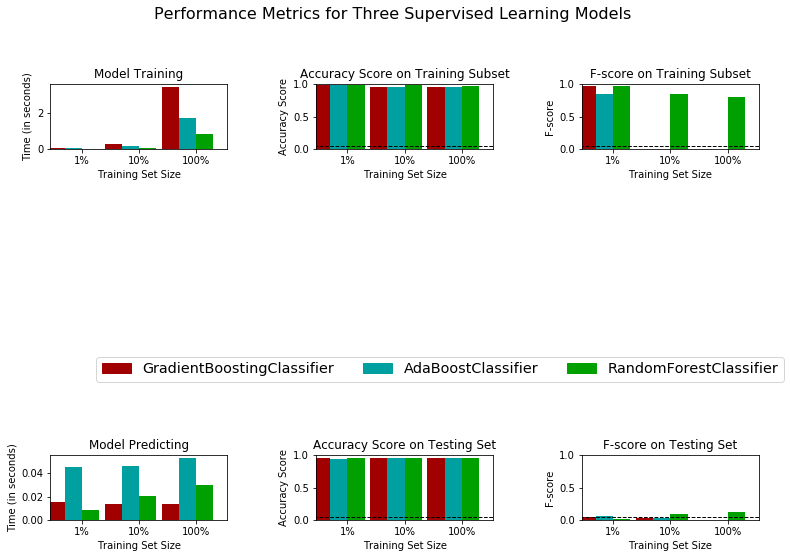

In [37]:
#TODO: Import the three supervised learning models from sklearn

#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
#from sklearn.ensemble import BaggingClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import SGDClassifier


# TODO: Initialize the three models
clf_A = GradientBoostingClassifier(random_state=100)
clf_B = AdaBoostClassifier(random_state=100)
clf_C = RandomForestClassifier(random_state=100)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train) * .1)
samples_1 = int(len(y_train) * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train[selected_feat], y_train, X_test[selected_feat], y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [38]:
results

{'GradientBoostingClassifier': {0: {'train_time': 0.07357382774353027,
   'pred_time': 0.015778064727783203,
   'acc_train': 0.9966666666666667,
   'acc_test': 0.9536306235201263,
   'f_train': 0.980392156862745,
   'f_test': 0.04073319755600815},
  1: {'train_time': 0.28714704513549805,
   'pred_time': 0.013617992401123047,
   'acc_train': 0.9633333333333334,
   'acc_test': 0.9571165482767693,
   'f_train': 0.0,
   'f_test': 0.02054794520547945},
  2: {'train_time': 3.4201419353485107,
   'pred_time': 0.013749122619628906,
   'acc_train': 0.9633333333333334,
   'acc_test': 0.9581689029202841,
   'f_train': 0.0,
   'f_test': 0.0}},
 'AdaBoostClassifier': {0: {'train_time': 0.05034017562866211,
   'pred_time': 0.04581403732299805,
   'acc_train': 0.9833333333333333,
   'acc_test': 0.9496842936069455,
   'f_train': 0.8571428571428571,
   'f_test': 0.06568778979907264},
  1: {'train_time': 0.15419912338256836,
   'pred_time': 0.04609990119934082,
   'acc_train': 0.9633333333333334,
   'ac

In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score

# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=100)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators': [150, 200, 500],
              'learning_rate': [0.1, 0.15, 0.2, 0.25],
               'max_depth':[2,3,4],
               'min_samples_leaf':[1,2,3],
               'min_samples_split': [1.0,2,3]
             }

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gliffton/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/gliffton/anaconda3/lib/python3.6/site-pac

In [ ]:
best_clf

In [ ]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier().fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)